In [1]:
from embedding.parser import Parser, Rule
from embedding.schema import Schema
from embedding.encoder import Encoder
from embedding.array import array_to_tree
from embedding.structure import Struct
import numpy as np
import matplotlib.pyplot as plt



def random_parse_tree(depth):
    rule_num = np.random.choice([0,1,2])
    
    if depth == 1 or rule_num == 0:
        return 'E', {'arg1': 'L', 'arg2': 'R'}

    if rule_num == 1:
        return 'E', {
            'arg1': 'L', 
            'arg2': random_parse_tree(depth - 1), 
            'arg3': 'R'}
    
    if rule_num == 2:
        return 'E', {
            'arg1': random_parse_tree(depth - 1), 
            'arg2': random_parse_tree(depth - 1) }
    
def deparse(st):
    res = []
    lab = st[0]
    attr = st[1] if len(st) == 2 else {}
    if lab == 'E':
        res += deparse(attr['arg1'])
        res += deparse(attr['arg2'])
        if len(attr) == 3:
            res += deparse(attr['arg3'])
    else:
        res.append(lab)
        
    return res

In [2]:




def test_parse(seq, exp, enc, sc):
    seq_vec = [x for x in map(enc, seq)]

    y = p.parse(seq_vec)
    
    exp = Struct.create(sc, exp)
    tr = en.decode(y[0])
    if tr is None:
        return False
    
    return tr.to_strings() == exp


    

In [3]:
def get_trees(n):
    trees = dict()

    def add_trees(n, depth, lim):
        l0 = len(trees)
        while len(trees) < l0 + n:
            while True:
                t = random_parse_tree(depth)
                if len(deparse(t)) <= lim:
                    trees[str(t)] = t
                    break

    add_trees(100, 4, 30)
    add_trees(100, 5, 30)
    add_trees(100, 6, 30)
    add_trees(100, 7, 30)
    add_trees(100, 8, 30)
    
    return trees

In [ ]:
good = 0
bad = 0
res = []

dims = [x for x in range(1000,190,-10)]

for dim in dims:
    trees = get_trees(100)
    sc = Schema(labels=['L', 'R', 'E'],
                attributes=['next', 'arg1', 'arg2', 'arg3'])

    en = Encoder(schema=sc, dim=dim, seed=42)
    def enc(a):
        return en.encode(array_to_tree(a))

    e = enc(['E'])

    r1 = Rule(length=2,
              pattern=enc(['L', 'R']),
              replacement=e)

    r2 = Rule(length=3,
             pattern=enc(['L', 'E', 'R']),
              replacement=e)

    r3 = Rule(length=2,
              pattern=enc(['E', 'E']),
              replacement=e)

    p = Parser(schema=sc,
               rules=[r1, r2, r3],
               next_a=en.attr_emb[sc.attr_to_ind['next']],
               args=[en.attr_emb[sc.attr_to_ind[x]] for x in ['arg1', 'arg2', 'arg3']])

    for t in trees.values():
        ld = len(deparse(t))
        ret = test_parse(deparse(t), t, enc, sc)
    
        if ret:
            good += 1
        else:
            bad += 1
        
        res.append((dim, ld, ret))
        print(dim, ld, good, bad)

1000 8 0 1
1000 6 1 1
1000 14 1 2
1000 2 2 2
1000 12 2 3
1000 4 3 3
1000 10 3 4
1000 10 4 4
1000 10 5 4
1000 8 6 4
1000 8 7 4
1000 10 7 5
1000 10 7 6
1000 8 8 6
1000 10 9 6
1000 8 9 7
1000 6 10 7
1000 10 10 8
1000 8 11 8
1000 8 12 8
1000 10 12 9
1000 6 13 9
1000 4 14 9
1000 12 15 9
1000 14 16 9
1000 14 16 10
1000 10 17 10
1000 10 17 11
1000 8 17 12
1000 8 18 12
1000 10 19 12
1000 14 19 13
1000 6 20 13
1000 8 20 14
1000 12 21 14
1000 10 21 15
1000 12 21 16
1000 6 22 16
1000 12 23 16
1000 12 23 17
1000 12 24 17
1000 10 25 17
1000 8 26 17
1000 10 26 18
1000 14 26 19
1000 10 27 19
1000 12 28 19
1000 8 29 19
1000 8 29 20
1000 12 30 20
1000 8 31 20
1000 12 31 21
1000 8 32 21
1000 14 33 21
1000 12 34 21
1000 8 34 22
1000 14 34 23
1000 12 34 24
1000 8 35 24
1000 12 36 24
1000 10 36 25
1000 14 36 26
1000 14 36 27
1000 10 36 28
1000 10 37 28
1000 12 37 29
1000 6 37 30
1000 8 38 30
1000 12 39 30
1000 12 39 31
1000 10 40 31
1000 12 40 32
1000 12 41 32
1000 14 41 33
1000 8 42 33
1000 12 42 34
1000 

In [49]:
rr = np.array(res)


(array([ 3.,  5., 14., 40., 51., 56., 36., 23.,  3.,  8.]),
 array([ 2. ,  4.2,  6.4,  8.6, 10.8, 13. , 15.2, 17.4, 19.6, 21.8, 24. ]),
 <BarContainer object of 10 artists>)

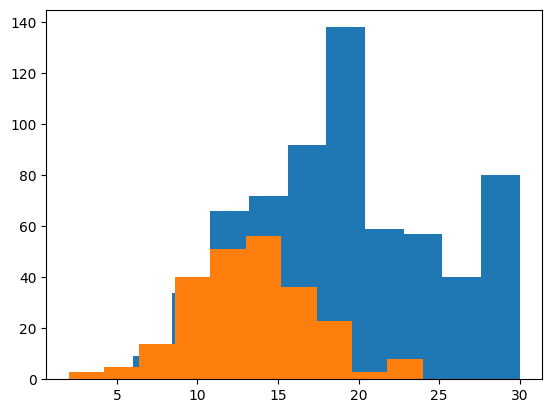

In [50]:
plt.hist(rr[rr[:,1]==0,0])
plt.hist(rr[rr[:,1]==1,0])


In [35]:
rr

array([[ 6,  1],
       [10,  0],
       [14,  0],
       ...,
       [12,  0],
       [24,  0],
       [22,  0]])